In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import matplotlib as mpl
import pandas as pd
import pylab as P
import numpy as np
import netCDF4
from matplotlib.ticker import MultipleLocator
from scipy.interpolate import *

In [3]:
# get file containing heights, pressures for L85 ancil
filename='/Users/ptg21/data/projects/TRANSCOM/ancil_creation/xkawa.p.avg2000.nc'
ncfile2     = netCDF4.Dataset(filename)

lon2        = ncfile2.variables['longitude'][:]
lat2        = ncfile2.variables['latitude'][:]
press       = ncfile2.variables['p'][:]
hybrid_ht   = ncfile2.variables['hybrid_ht'][:]
nheights    = len(hybrid_ht)
times2      = ncfile2.variables['time']
nmonths2, nheights, ny2, nx2 = np.shape(press)

# if required, can shift lon grid as follows
#press,lon2 = shiftgrid(180.,press,lon2,start=False)

In [4]:
filename='/Users/ptg21/data/projects/TRANSCOM/2000/ordonez_ch2br2_annual.nc'
ncfile1     = netCDF4.Dataset(filename)
lona        = ncfile1.variables['longitude'][:]
lata        = ncfile1.variables['latitude'][:]

hybrid_ht   = ncfile1.variables['hybrid_ht']
CH2Br2      = ncfile1.variables['field1861'][:,:,:]
nlevelsa, ntimesa, nya, nxa = np.shape(CH2Br2)

In [5]:
mrch2br2 = 2*81+2+12.
mrair = 28.8
CH2Br2 = CH2Br2* mrair/mrch2br2/1e-12

In [6]:
ch2br2_zonal_mean=np.empty([nmonths2, nheights, ny2])

for imonth in range(0,12):
    for ilev in range(0,85):
        for ivar in range (0,ny2):
            ch2br2_zonal_mean[imonth,ilev,ivar] = np.mean(CH2Br2[imonth,ilev,ivar,:])
    

In [7]:
ch2br2_tropical_mean = np.empty([12,85])
for imonth in range(0,12):
    for ilev in range(0,85):
        ch2br2_tropical_mean[imonth, ilev]=np.mean(ch2br2_zonal_mean[imonth,ilev,ny2/2-16:ny2/2+17])
        

In [8]:
press_prof = press[0,:,nx2/2,ny2/2]/100
ch2br2_annual_mean_prof = np.empty([85])
ch2br2_annual_stdev_prof = np.empty([85])
for ilev in range(0,85):
    ch2br2_annual_mean_prof[ilev] = np.mean(ch2br2_tropical_mean[:,ilev])
#    ch2br2_annual_stdev_prof[ilev] = np.std(ch2br2_tropical_mean[:,ilev])
    ch2br2_annual_stdev_prof[ilev] = ch2br2_tropical_mean[:,ilev].max()-ch2br2_tropical_mean[:,ilev].min()
    

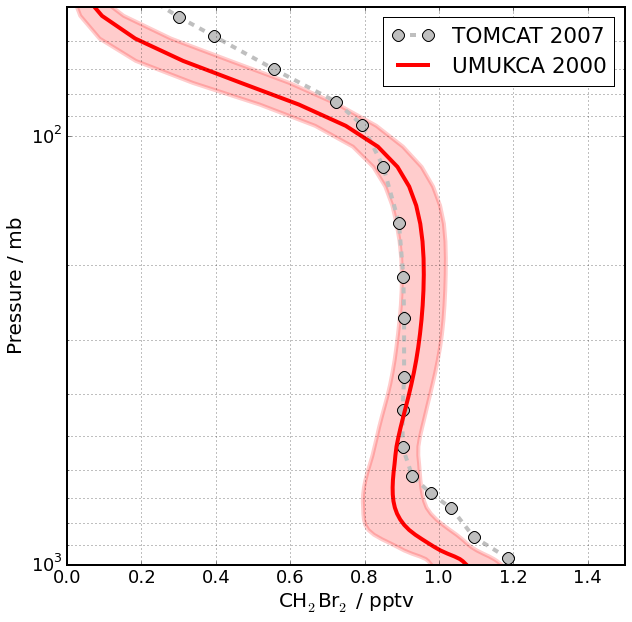

In [11]:
hoss_data=P.loadtxt('/Users/ptg21/data/projects/TRANSCOM/hossaini_res.txt')
plt.clf()
mpl.rcParams['font.size']=18
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams["lines.markeredgewidth"]=1

plt.figure(figsize=(10,10),dpi=300)
plt.subplot(111, yscale="log")

plt.hold(True)
plt.grid(True,which='both')

plt.plot(hoss_data[:,0], hoss_data[:,1] , 'o--', color = '0.75', lw=4, markersize=12, label='TOMCAT 2007')

plt.fill_betweenx(press_prof, 
                  ch2br2_annual_mean_prof-ch2br2_annual_stdev_prof, 
                  ch2br2_annual_mean_prof+ch2br2_annual_stdev_prof,
                  alpha=0.2, edgecolor='red', facecolor='red',
                  linewidth=4,  antialiased=True)

plt.plot(ch2br2_annual_mean_prof[:], press_prof, 'r-', lw=4 ,label='UMUKCA 2000')

plt.ylim([1000,50])
plt.xlim([0,1.5])
plt.ylabel('Pressure / mb', fontsize=20)
plt.xlabel('CH$_2$Br$_2$ / pptv', fontsize=20 )
plt.legend()
plt.savefig('/Users/ptg21/Desktop/Ch2br2_profile.png')

(0, 1.5)

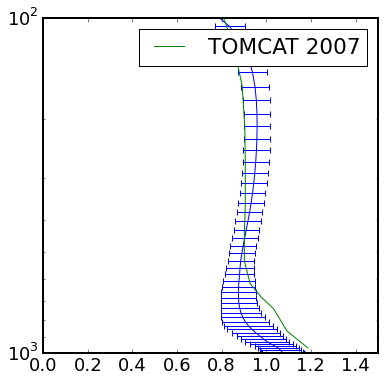

In [331]:
hoss_data=P.loadtxt('/Users/ptg21/hossaini_res.txt')
plt.clf()
plt.figure(figsize=(6,6),dpi=200)
plt.subplot(111, yscale="log")

plt.hold(True)
plt.errorbar(ch2br2_annual_mean_prof[:], press_prof, xerr=ch2br2_annual_stdev_prof)#, 'o--', label='UKCA')#, ch2br2_std)
plt.plot(hoss_data[:,0], hoss_data[:,1] , label='TOMCAT 2007')
plt.legend()
plt.ylim([1000,100])
plt.xlim([0,1.5])


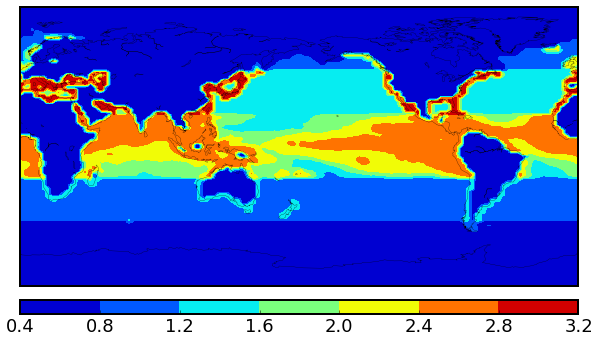

In [336]:
filename='/Users/ptg21/data/projects/TRANSCOM/ancil_creation/ch2br2_emissions/ordonez_ch2br2_emissions_regrid.nc'
ncfile2     = netCDF4.Dataset(filename)
lon2        = ncfile2.variables['longitude'][:]
lat2        = ncfile2.variables['latitude'][:]
CH2Br2_em   = ncfile2.variables['CH2BR2'][:,:,:]
ntimes2, ny2, nx2 = np.shape(CH2Br2_em)

fig = plt.figure(num=1,figsize=(10,10),dpi=200)
plt.clf()

m2 = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution='c')
lons2, lats2 = m2.makegrid(nx2, ny2)
x2,y2 = m2(lat2, lon2)
im3 = m2.contourf(lons2,lats2, CH2Br2_em[0,:,:]) 
m2.colorbar(im2,location='bottom',pad="5%")
m2.drawcoastlines(linewidth=0.25)
plt.savefig('/Users/ptg21/Desktop/CH2Br2_emissions.png')

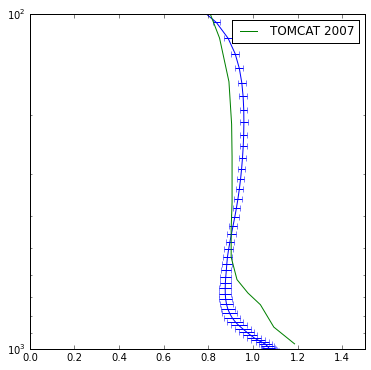

In [264]:
hoss_data=P.loadtxt('/Users/ptg21/hossaini_res.txt')
plt.clf()
plt.figure(figsize=(6,6),dpi=200)
plt.subplot(111, yscale="log")

plt.hold(True)
plt.errorbar(ch2br2_annual_mean_prof[:], press_prof, xerr=ch2br2_annual_stdev_prof)#, 'o--', label='UKCA')#, ch2br2_std)
plt.plot(hoss_data[:,0], hoss_data[:,1] , label='TOMCAT 2007')
plt.legend()
plt.ylim([1000,100])
plt.xlim([0,1.5])
